# Pose Estimation with MoveNet

In previous notebooks, our models produced:

- A class label
- A regression value

Now we explore structured outputs:

> Human pose estimation.

Pose estimation models predict keypoint coordinates for joints:
- Shoulders
- Elbows
- Knees
- Ankles
- etc.

We will use MoveNet, a lightweight pretrained pose estimation model,
and run inference locally on CPU.

This demonstrates:

- Multi-output structured predictions
- Coordinate regression
- Confidence scores per keypoint

No training is required for this notebook.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

# Load MoveNet (Lightning)

model = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
movenet = model.signatures['serving_default']

# Load Image

import os

local_image_path = "11b_bowling.jpg"

if not os.path.exists(local_image_path):
    raise FileNotFoundError(
        "Place a human image named '11b_bowling.jpg' in the same folder as this notebook."
    )

image = tf.io.read_file(local_image_path)
image = tf.image.decode_jpeg(image)
image = tf.image.resize(image, (192, 192))

input_image = tf.expand_dims(image, axis=0)
input_image = tf.cast(input_image, dtype=tf.int32)

# Run Inference

outputs = movenet(input_image)
keypoints = outputs['output_0'].numpy()

print("Keypoints shape:", keypoints.shape)


Keypoints shape: (1, 1, 17, 3)


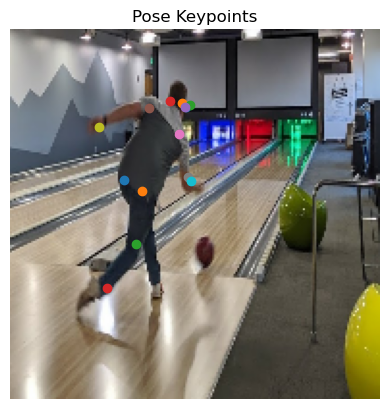

In [5]:
# Visualize Keypoints

image_np = image.numpy().astype(np.uint8)
h, w, _ = image_np.shape

plt.imshow(image_np)

for kp in keypoints[0][0]:
    y, x, conf = kp
    if conf > 0.3:
        plt.scatter(x * w, y * h)

plt.title("Pose Keypoints")
plt.axis("off")
plt.show()


## Reflection

Unlike classification, pose estimation outputs:

- Multiple coordinate pairs
- Confidence per keypoint
- Structured spatial information

Computer vision problems can produce:
- Labels
- Numbers
- Bounding boxes
- Keypoints
- Masks

The formulation of the problem determines the model architecture.
